# Ranking between airport hubs 

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from graph.read_network import generate_network_without_edge_weight

In [2]:
G = generate_network_without_edge_weight("../data/data.csv")

In [20]:
node_ranking = sorted([
    (node, degree) for (node, degree) in G.degree()
], key=lambda x : x[1], reverse=True)

In [31]:
def ranking_airports(G: nx.DiGraph, top_value: int = 10):
    top_values = node_ranking[:top_value]
    airports, count = zip(*top_values)
    
    # Criar o gráfico de barras
    plt.bar(airports, count, color=np.random.rand(len(airports), 3))

    # Definir título e rótulos
    plt.title("Airport Ranking Visualization")
    plt.xlabel("Airport code")
    plt.ylabel("Number of connections")
    plt.xticks(rotation=45)

    # Mostrar o gráfico
    plt.show()

def ranking_airports_connection(G: nx.DiGraph, top_value: int = 10):
    G1 = nx.Graph()
    top_values = node_ranking[:top_value]
    node_top_values = [node for node, _ in top_values]

    for node in node_top_values:
        G1.add_node(node)
        for aux in node_top_values:
            if node == aux:
                continue
            
            if not G.has_edge(node, aux) or not G.has_edge(aux, node):
                continue

            if not G1.has_edge(node, aux) and node != aux:
                G1.add_edge(node, aux)

    N = G1.number_of_nodes()
    L = G1.number_of_edges()

    is_complete = L == (N*(N-1)//2)

    print("Is the network complete? {}".format(is_complete))

    return G1

def print_network(G: nx.DiGraph):
    plt.figure(figsize=(20, 20))
    pos = nx.spring_layout(G, k=0.9, seed=70) 
    nx.draw(G, pos, node_size=1000, with_labels=True)
    plt.show()

## Top 10 airport based on number of flights

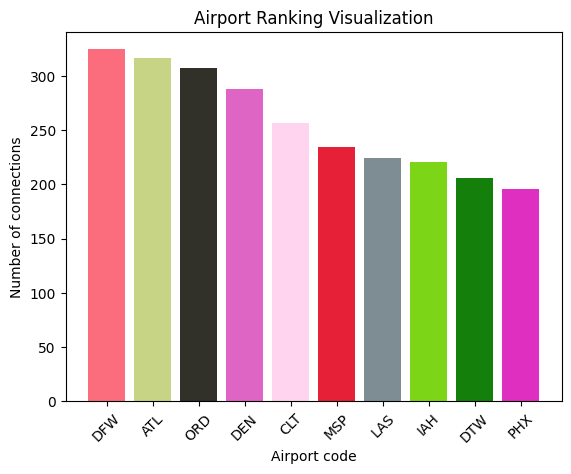

Is the network complete? True


In [32]:
ranking_airports(G, 10)
G1 = ranking_airports_connection(G, 10)

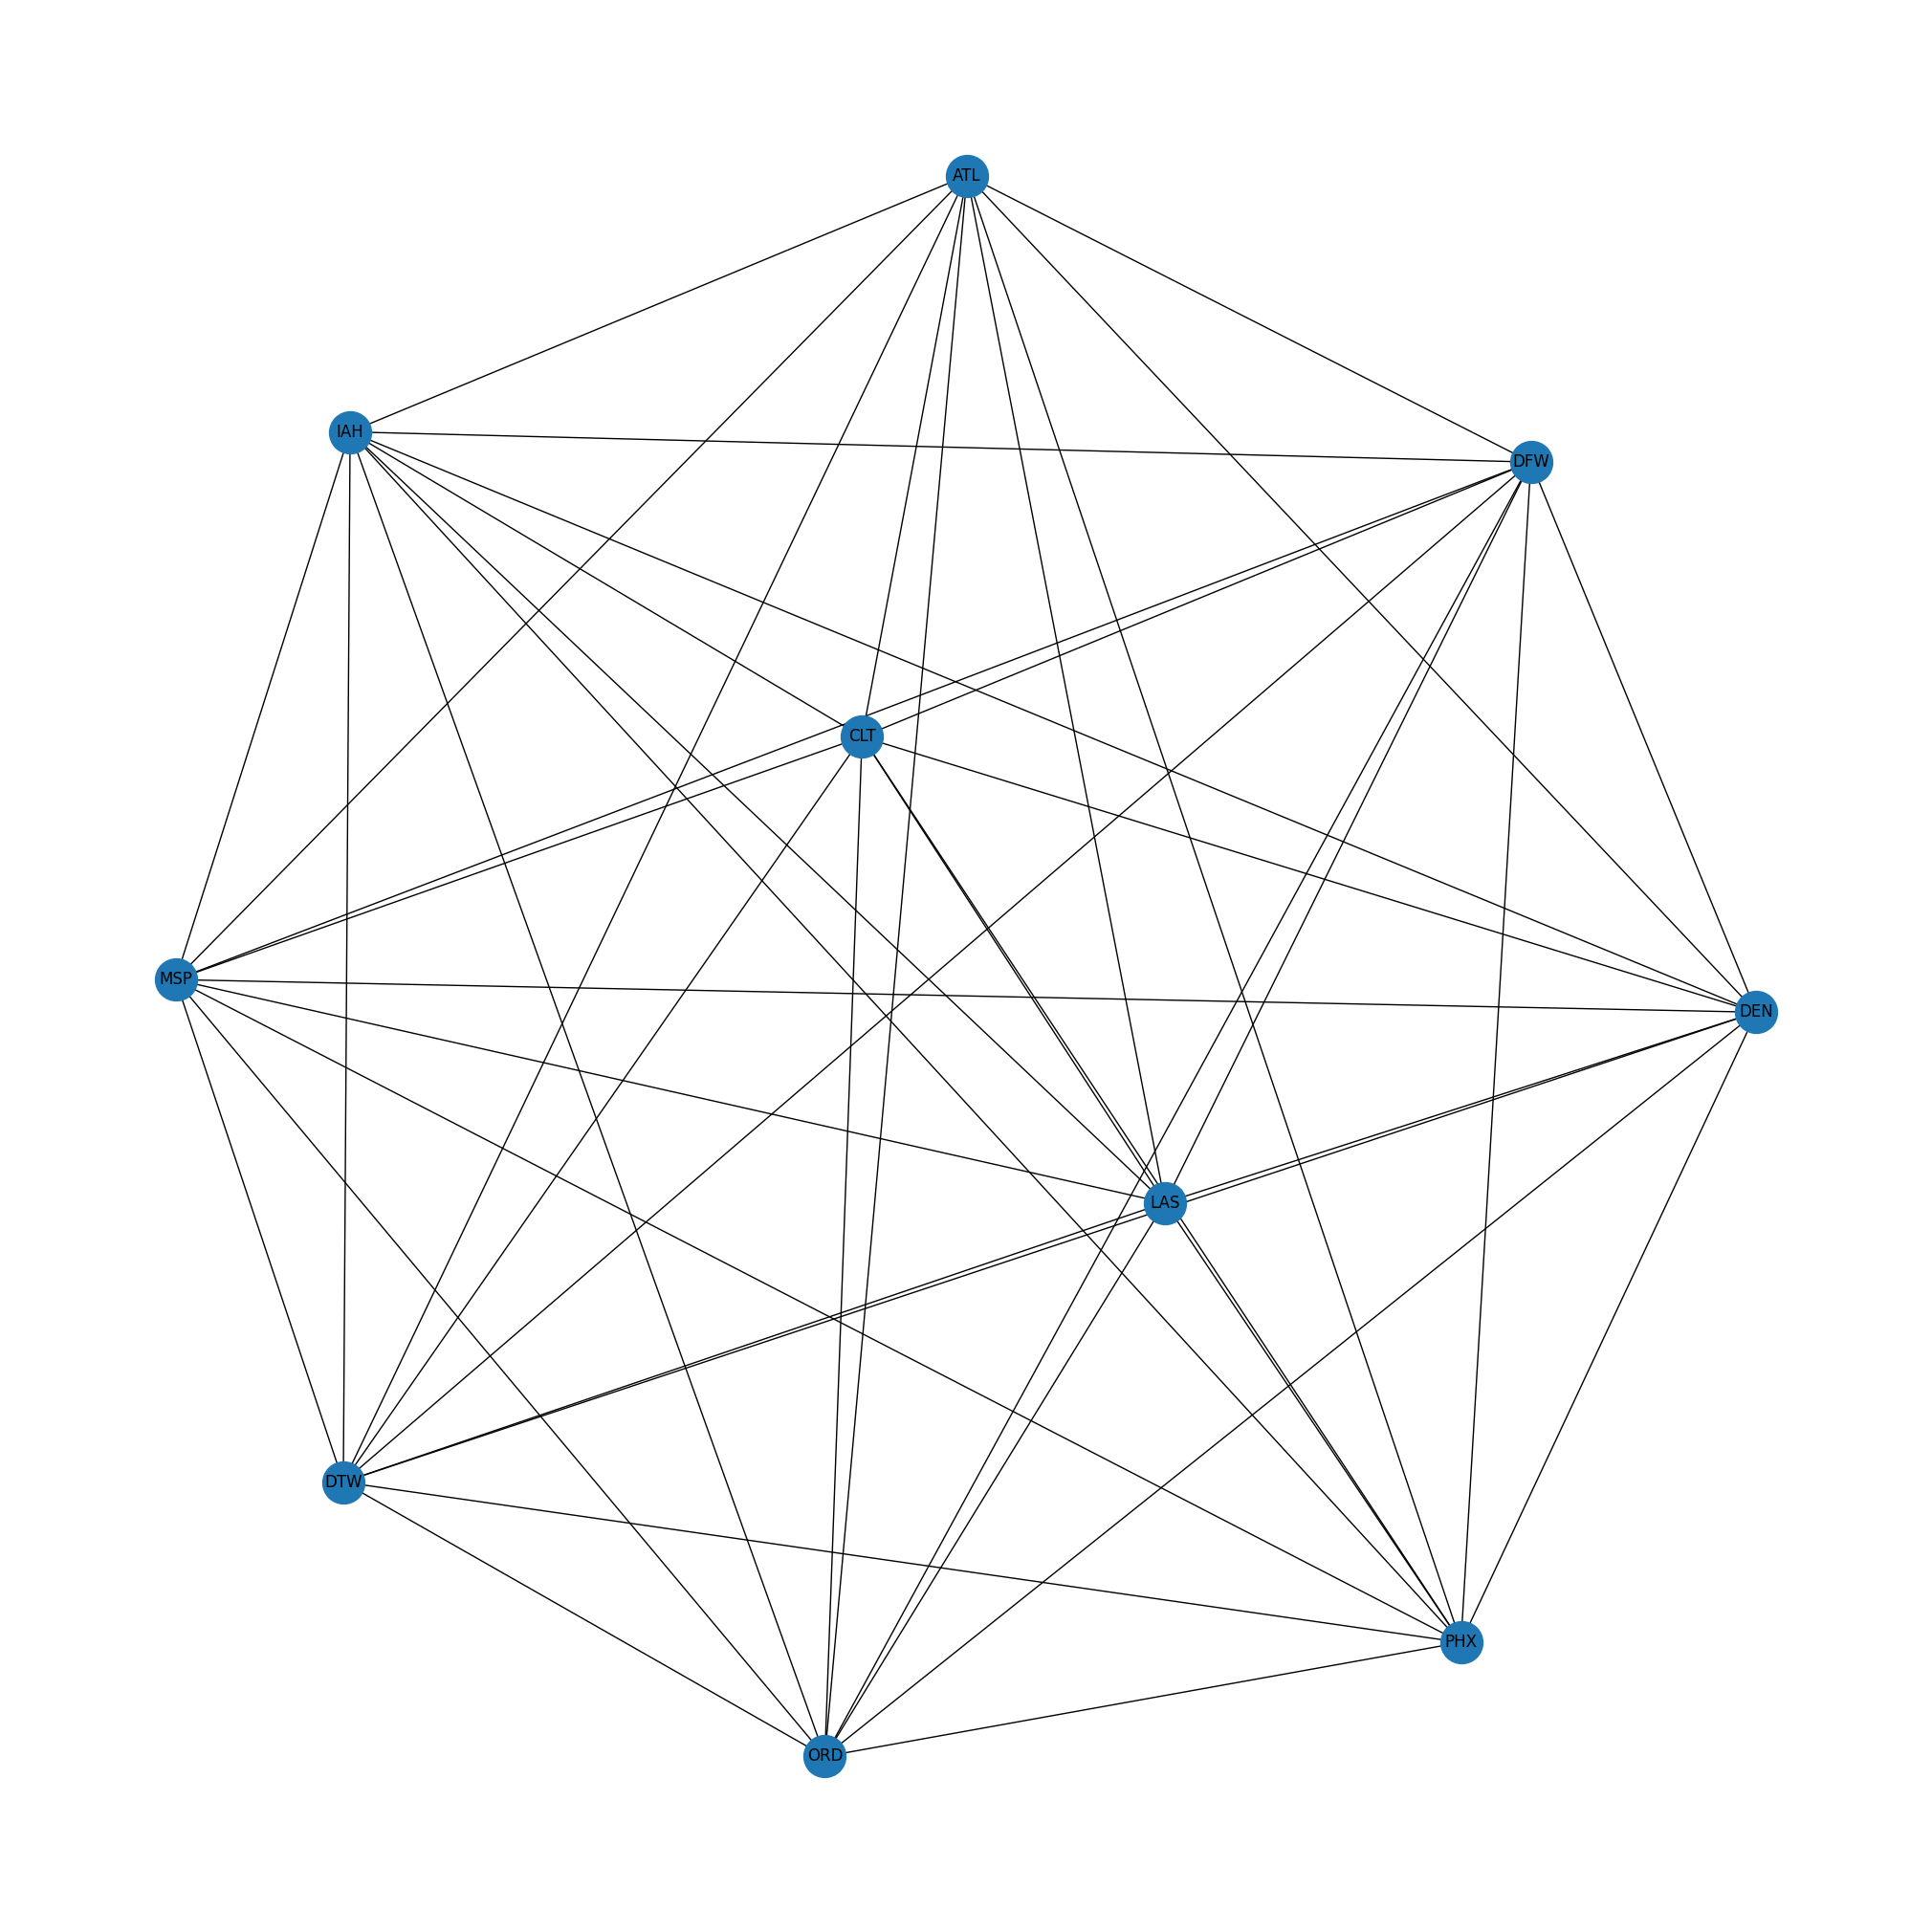

[('DFW', 9), ('ATL', 9), ('ORD', 9), ('DEN', 9), ('CLT', 9), ('MSP', 9), ('LAS', 9), ('IAH', 9), ('DTW', 9), ('PHX', 9)]


In [38]:
## Connection between nodes
print_network(G1)
print(G1.degree())

## Top 20 airport based on number of flights

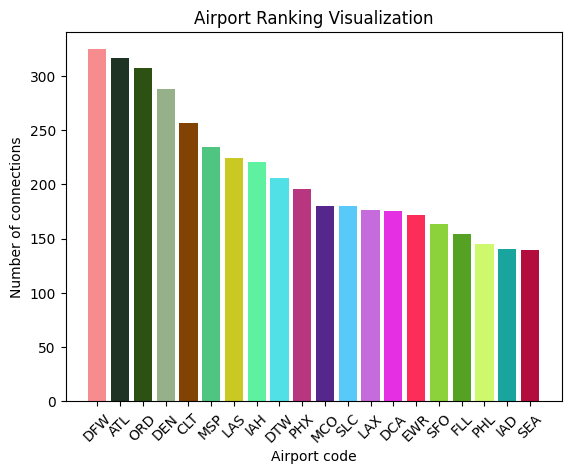

Is the network complete? False


In [34]:
ranking_airports(G, 20)
G2 = ranking_airports_connection(G, 20)

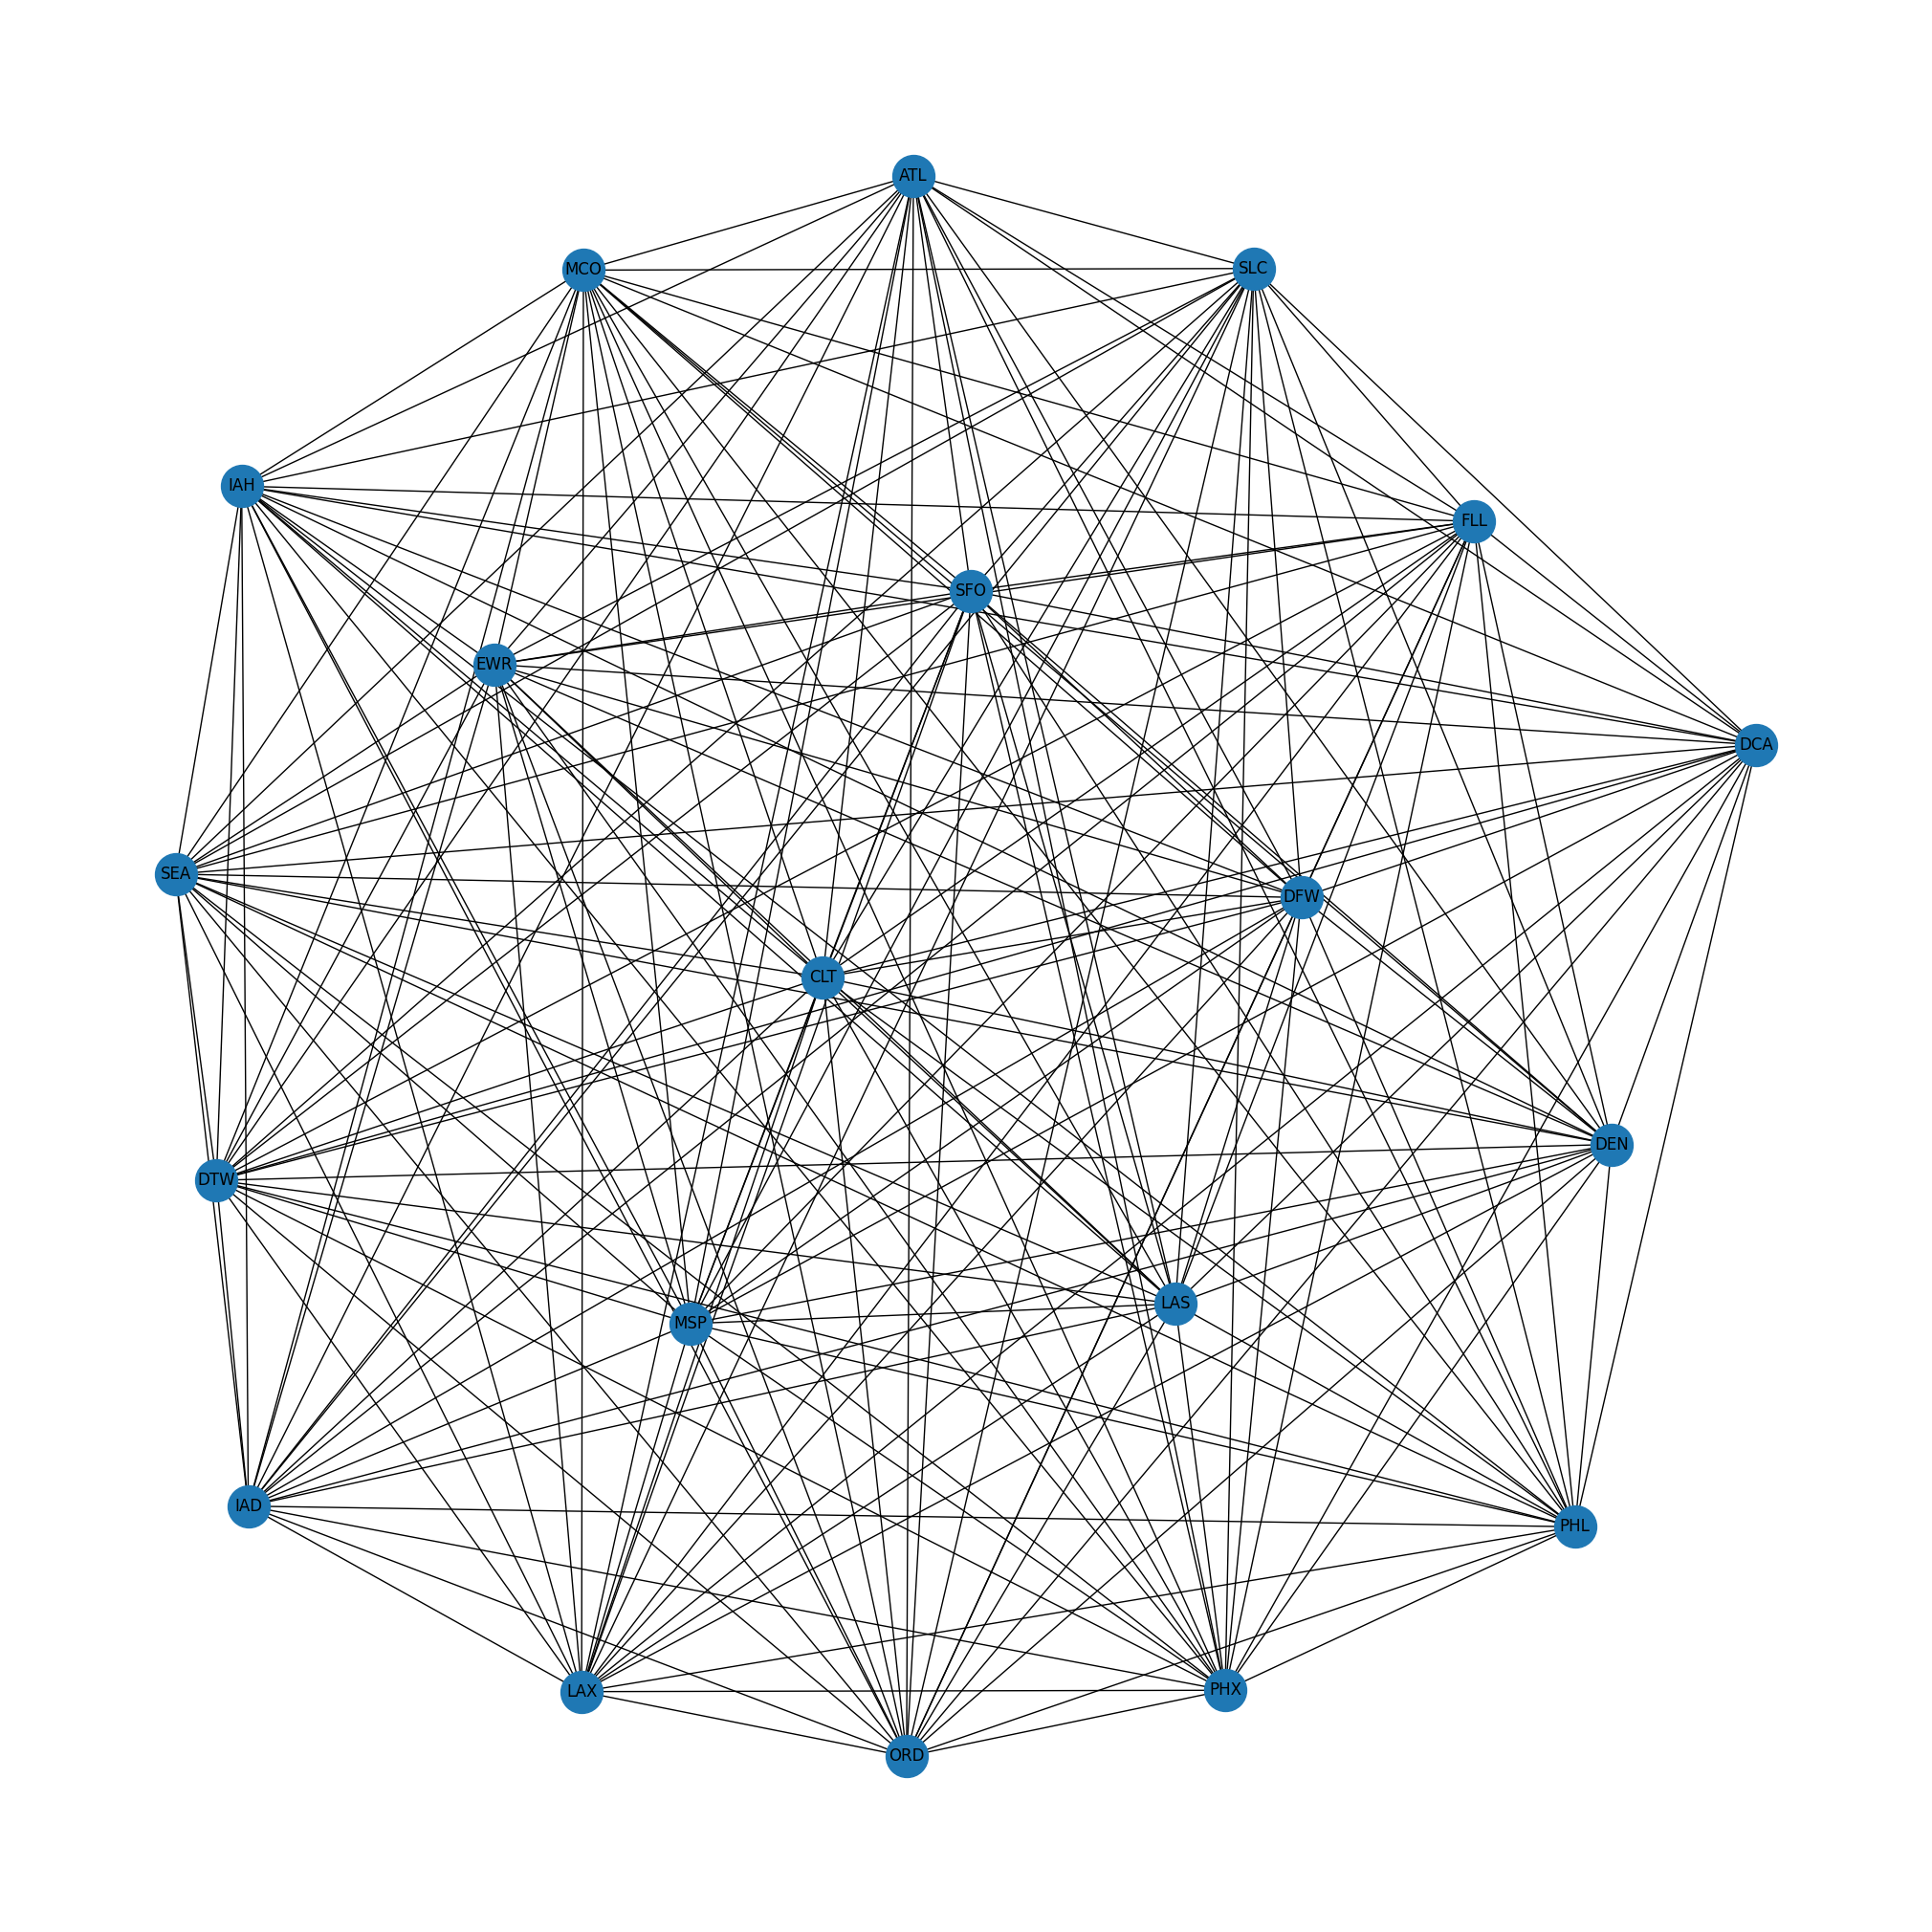

In [35]:
print_network(G2)

# Top 30 airports

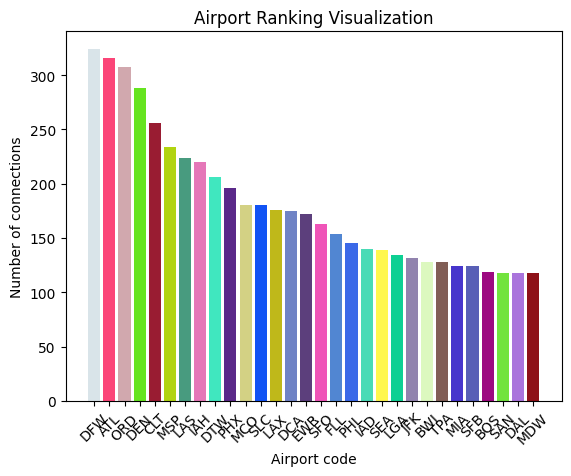

Is the network complete? False


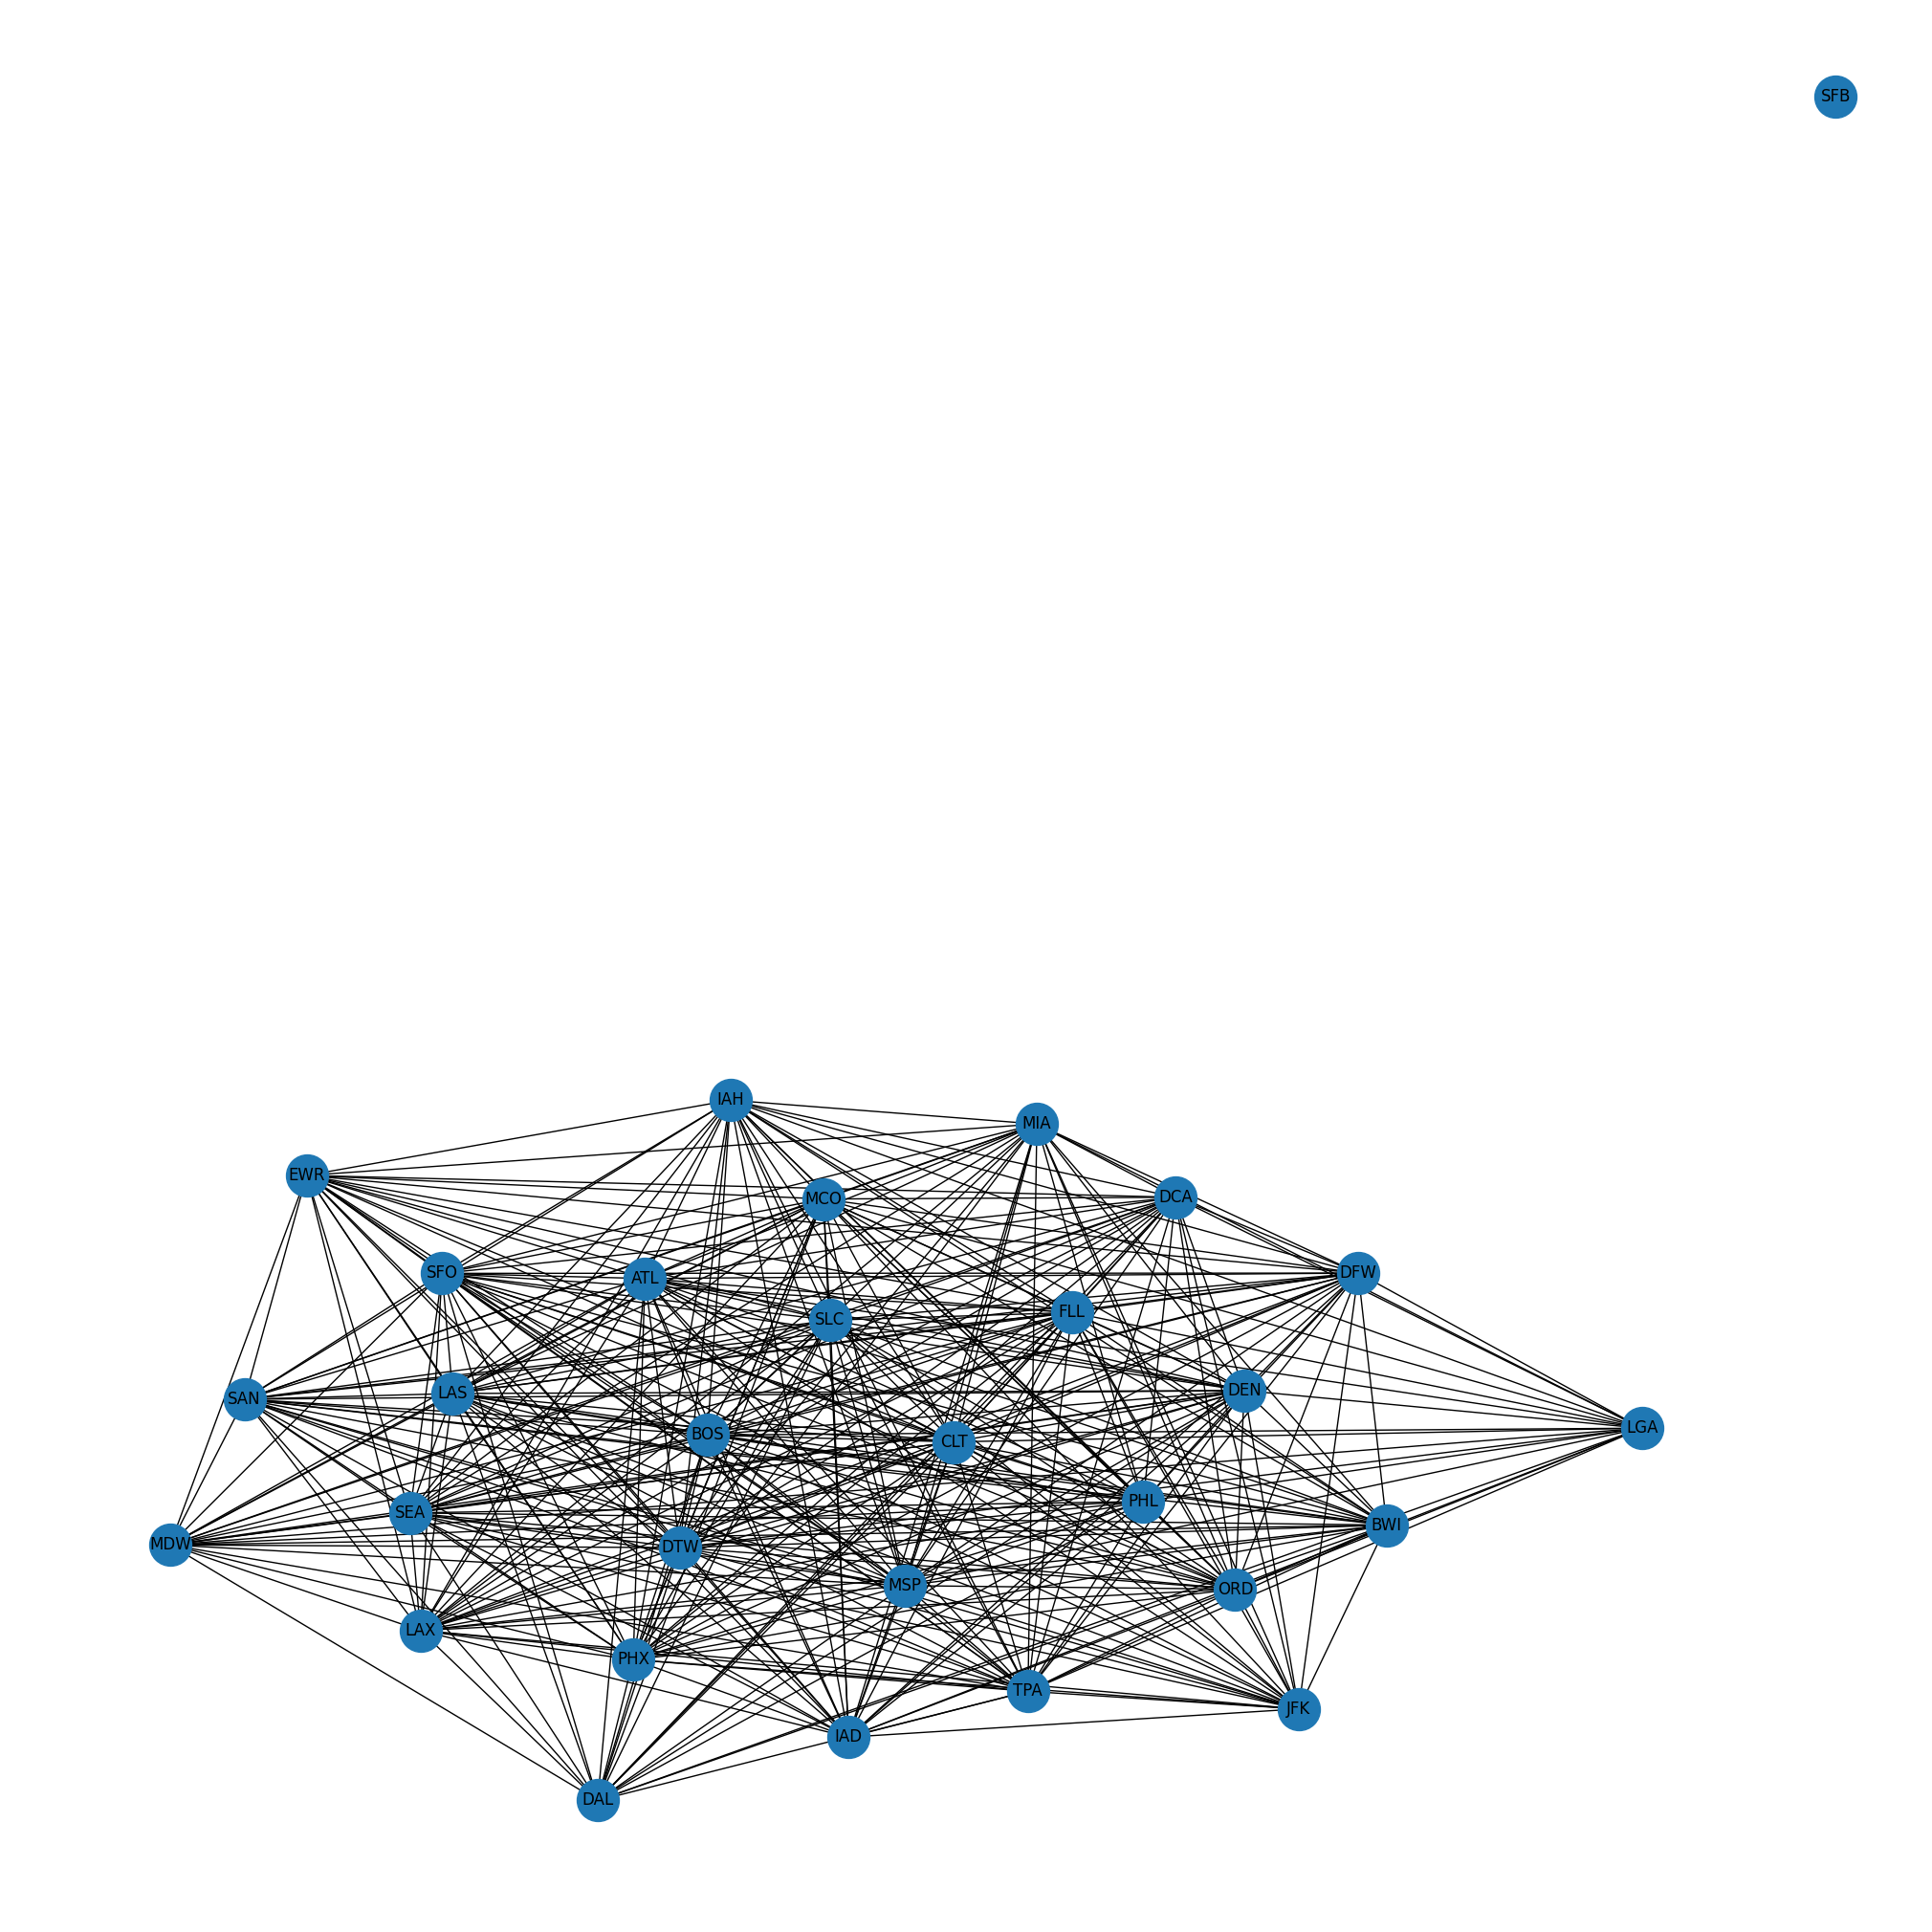

In [36]:
ranking_airports(G, 30)
print_network(ranking_airports_connection(G, 30))